<a href="https://colab.research.google.com/github/FaisalAhmedBijoy/Deep-CNN-Architecture-Implementation/blob/main/Experiment_Thesis_Image_Classification_with_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [95]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import PIL
import glob

In [96]:
print('Current working directory: ',os.getcwd())

Current working directory:  /content


## Setup Dataset Path 

In [97]:
'''
building_house=glob.glob('dataset_building/building_house/*.*')
mosque=glob.glob('dataset_building/mosque/*.*')
temple=glob.glob('dataset_building/temple/*.*')
tinshed=glob.glob('dataset_building/tinshed/*.*')
sky_building=glob.glob('dataset_building/sky_building/*.*')
mud_house=glob.glob('dataset_building/mud_house/*.*')
'''


"\nbuilding_house=glob.glob('dataset_building/building_house/*.*')\nmosque=glob.glob('dataset_building/mosque/*.*')\ntemple=glob.glob('dataset_building/temple/*.*')\ntinshed=glob.glob('dataset_building/tinshed/*.*')\nsky_building=glob.glob('dataset_building/sky_building/*.*')\nmud_house=glob.glob('dataset_building/mud_house/*.*')\n"

In [98]:
''' 
print('Building house data : ',len(building_house))
print('Mosque data: ',len(mosque))
print('Temple data: ',len(temple))
print('Tinshed data: ',len(tinshed))
print('Sky building data: ',len(sky_building))
print('Mud house data: ',len(mud_house))
'''


" \nprint('Building house data : ',len(building_house))\nprint('Mosque data: ',len(mosque))\nprint('Temple data: ',len(temple))\nprint('Tinshed data: ',len(tinshed))\nprint('Sky building data: ',len(sky_building))\nprint('Mud house data: ',len(mud_house))\n"

In [99]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [100]:
train_path='/content/drive/My Drive/CSE 4000 Thesis/Dataset1500/train'
test_path='/content/drive/My Drive/CSE 4000 Thesis/Dataset1500/test'
print(os.listdir(train_path))
print(os.listdir(test_path))

['building_house', 'mosque', 'temple', 'tinshed', 'mud_house', 'sky_building']
['mud_house', 'building_house', 'mosque', 'sky_building', 'temple', 'tinshed']


## Dataset Preprocssing using ImageDataGenerator

In [101]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [102]:
WIDTH=224
HEIGHT=224

In [103]:
train_generator = ImageDataGenerator(rescale=1./255,
                                    horizontal_flip=True,
                                    shear_range=0.2 ,
                                    zoom_range=0.2,
                                    rotation_range=10,
                                    height_shift_range=0.2,
                                    fill_mode='nearest',
                                    validation_split=0.2)
                                     
train_dataset = train_generator.flow_from_directory(batch_size=32,
                                                 directory=train_path,
                                                 shuffle=True,
                                                 seed=42,
                                                 target_size=(WIDTH, HEIGHT),
                                                 class_mode='categorical',
                                                 subset='training')

validation_dataset = train_generator.flow_from_directory(batch_size=32,
                                                 directory=train_path,
                                                 shuffle=True,
                                                 seed=42,
                                                 target_size=(WIDTH, HEIGHT), 
                                                 class_mode='categorical',
                                                 subset='validation')

Found 960 images belonging to 6 classes.
Found 240 images belonging to 6 classes.


In [104]:
test_generator=ImageDataGenerator(rescale=1./255)
test_dataset = test_generator.flow_from_directory(batch_size=32,
                                                 directory=test_path,
                                                 shuffle=True,
                                                 seed=42,
                                                 target_size=(WIDTH, HEIGHT), 
                                                 class_mode='categorical')

Found 300 images belonging to 6 classes.


In [105]:
train_dataset.class_indices

{'building_house': 0,
 'mosque': 1,
 'mud_house': 2,
 'sky_building': 3,
 'temple': 4,
 'tinshed': 5}

In [106]:
validation_dataset.class_indices

{'building_house': 0,
 'mosque': 1,
 'mud_house': 2,
 'sky_building': 3,
 'temple': 4,
 'tinshed': 5}

In [107]:
total_class=len(train_dataset.class_indices)
print('Number of classes in dataset: ',total_class)

Number of classes in dataset:  6


## Plot some random image
- class 0: building house
- class 1: mosque
- class 2: mud house
- class 3: sky building
- class 4: temple
- class 5: tinshed

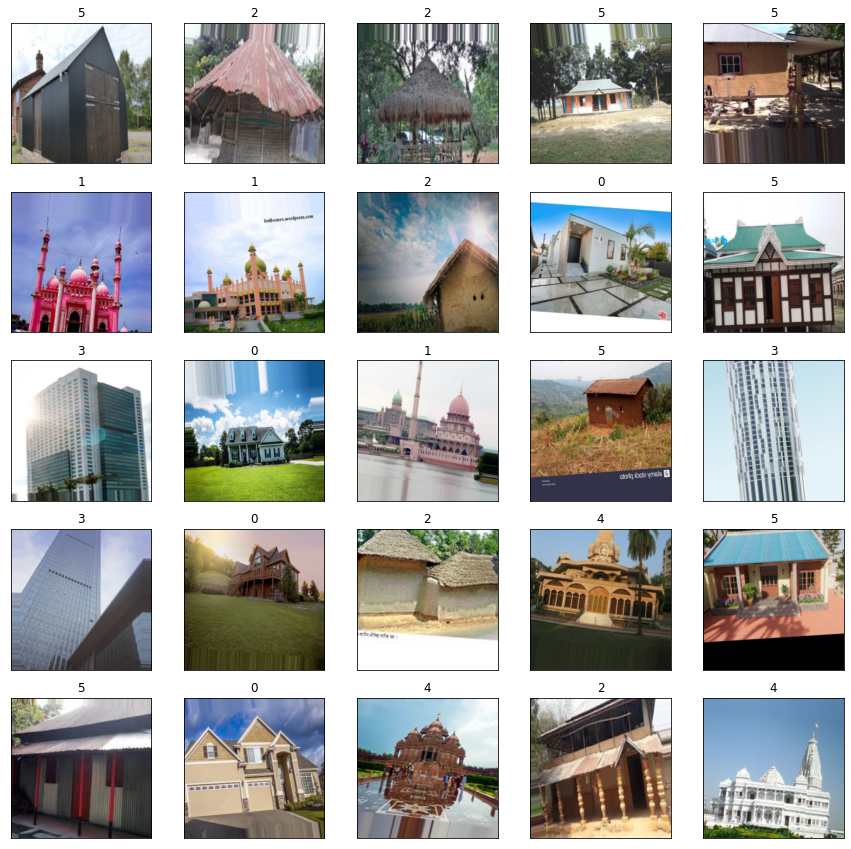

In [108]:
x,y=train_dataset.next()
fig=plt.figure(figsize=(15,15))
rows=5
cols=5
for i in range(rows*cols):
    fig.add_subplot(rows,cols,i+1)
    image=x[i]
    plt.imshow(image)
    plt.title(np.argmax(y[i]))
    plt.xticks([])
    plt.yticks([])
    
plt.show()

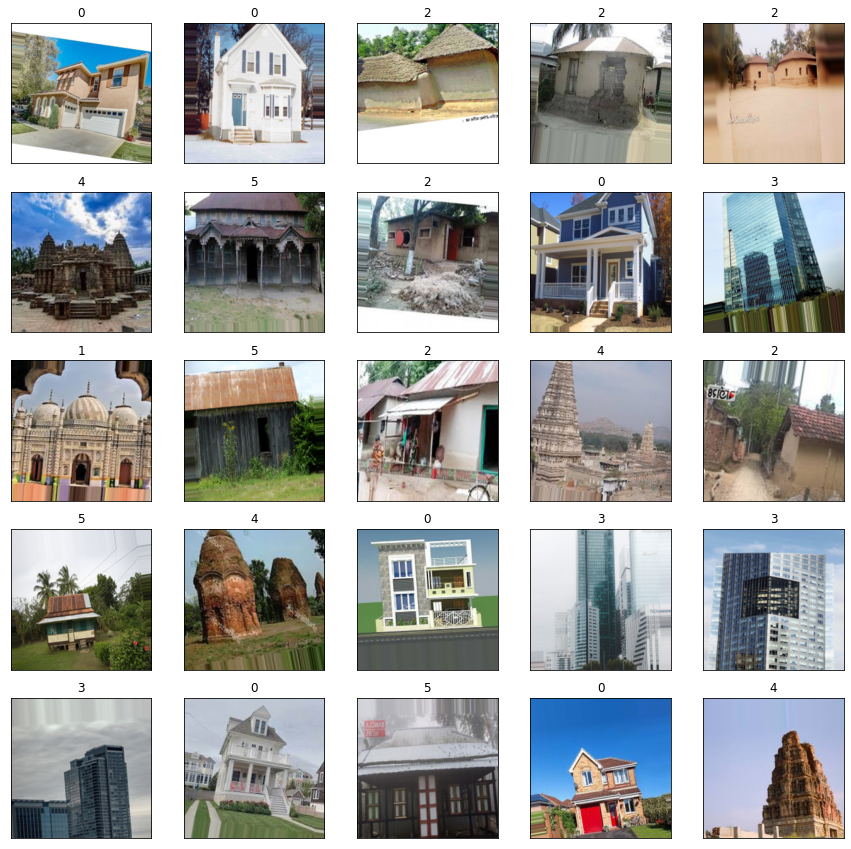

In [109]:
x,y=validation_dataset.next()
fig=plt.figure(figsize=(15,15))
rows=5
cols=5
for i in range(rows*cols):
    fig.add_subplot(rows,cols,i+1)
    image=x[i]
    plt.imshow(image)
    plt.title(np.argmax(y[i]))
    plt.xticks([])
    plt.yticks([])
    
plt.show()

## Configure the dataset for perfomance

In [110]:
"""
train_ds = train_dataset.prefetch(buffer_size=32)
val_ds = validation_dataet.prefetch(buffer_size=32)
"""

'\ntrain_ds = train_dataset.prefetch(buffer_size=32)\nval_ds = validation_dataet.prefetch(buffer_size=32)\n'

## Define Convolutional Neural Network Architecture

In [111]:
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
import numpy as np

In [112]:
inputs = keras.Input(shape=(224,224,3))

x = layers.Conv2D(32, 3, strides=2, padding="same")(inputs)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)

x = layers.Conv2D(64, 3, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)

previous_block_activation = x  # Set aside residual



In [113]:
for size in [128, 256, 512, 728]:
    x = layers.Activation("relu")(x)
    x = layers.SeparableConv2D(size, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)

    x = layers.Activation("relu")(x)
    x = layers.SeparableConv2D(size, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)

    x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

        # Project residual
    residual = layers.Conv2D(size, 1, strides=2, padding="same")(previous_block_activation)
    x = layers.add([x, residual])  # Add back residual
    previous_block_activation = x  # Set aside next residual

    

In [114]:
num_classes=6

In [115]:
x = layers.SeparableConv2D(1024, 3, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)

x = layers.GlobalAveragePooling2D()(x)
if num_classes == 2:
    activation = "sigmoid"
    units = 1
else:
    activation = "softmax"
    units = num_classes

x = layers.Dropout(0.5)(x)
outputs = layers.Dense(units, activation=activation)(x)

## Create Model

In [116]:
model=keras.Model(inputs,outputs,name='classifier')

In [117]:
model.summary()

Model: "classifier"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_12 (Conv2D)              (None, 112, 112, 32) 896         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_22 (BatchNo (None, 112, 112, 32) 128         conv2d_12[0][0]                  
__________________________________________________________________________________________________
activation_22 (Activation)      (None, 112, 112, 32) 0           batch_normalization_22[0][0]     
_________________________________________________________________________________________

/content/drive/MyDrive/CSE 4000 Thesis/Complex DNN Architecture/CNN1625129690.png


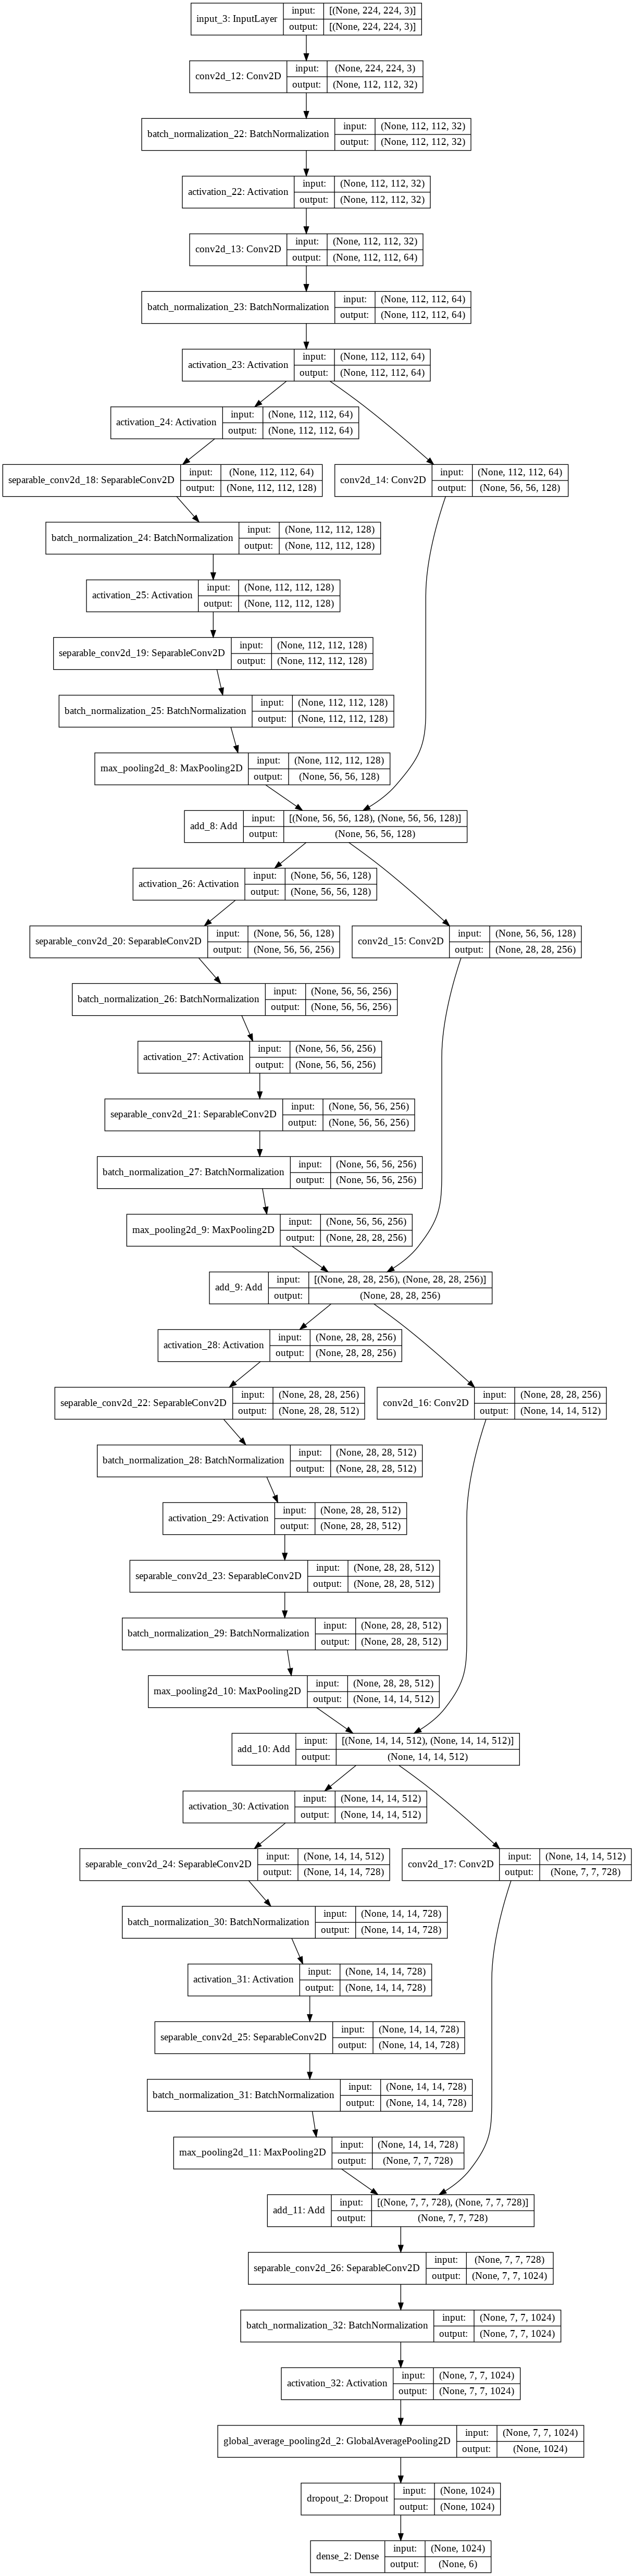

In [118]:
import time
t=time.time()
image_name='/content/drive/MyDrive/CSE 4000 Thesis/Complex DNN Architecture/CNN'+str(int(t))+'.png'
print(image_name)
keras.utils.plot_model(model,show_shapes=True,to_file=image_name)

## Compile CNN Model

In [120]:
model.compile(loss='categorical_crossentropy' ,
              optimizer='rmsprop' ,
              metrics=['accuracy',
                       tf.keras.metrics.Precision(),
                       tf.keras.metrics.Recall(),
                       tf.keras.metrics.AUC()])

## Trained  CNN Model

In [121]:
epochs=100
batch_size=32
trainset_length=len(train_dataset.labels)
validation_length=len(validation_dataset.labels)
steps_per_epoch=(trainset_length//batch_size)
validation_steps=(validation_length//batch_size)
print(trainset_length)
print(validation_length)
print(steps_per_epoch)
print(validation_steps)

960
240
30
7


In [122]:
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath='/content/drive/MyDrive/CSE 4000 Thesis/Transfer Learning TF Keras/building.model.best.hdf5', verbose=1 ,save_best_only=True)

In [123]:
history = model.fit(train_dataset,
                    steps_per_epoch = steps_per_epoch,
                    epochs=epochs,
                    validation_data=validation_dataset,
                    validation_steps=validation_steps,
                    callbacks=[checkpointer])

Epoch 1/100
30/30 [==============================] - 23s 660ms/step - loss: 1.7052 - accuracy: 0.4062 - precision_1: 0.4596 - recall_1: 0.2781 - auc_1: 0.7574 - val_loss: 1.7941 - val_accuracy: 0.1741 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00 - val_auc_1: 0.5128

Epoch 00001: val_loss improved from inf to 1.79414, saving model to /content/drive/MyDrive/CSE 4000 Thesis/Transfer Learning TF Keras/building.model.best.hdf5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/100
30/30 [==============================] - 19s 634ms/step - loss: 1.2824 - accuracy: 0.4938 - precision_1: 0.6019 - recall_1: 0.3969 - auc_1: 0.8416 - val_loss: 1.8412 - val_accuracy: 0.1607 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00 - val_auc_1: 0.4952

Epoch 00002: val_loss did not improve from 1.79414
Epoch 3/100
30/30 [==============================] - 19s 633ms/step - loss: 1.0608 - accuracy: 0.5885 - precision_1: 0.6648 - recall_1: 0.4875 - auc_1: 0.8894 - val_loss: 1.9044 - val_accuracy: 0.1652 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00 - val_auc_1: 0.5161

Epoch 00003: val_loss did not improve from 1.79414
Epoch 4/100
30/30 [==============================] - 19s 627ms/step - loss: 1.0102 - accuracy: 0.6115 - precision_1: 0.6957 - recall_1: 0.5333 - auc_1: 0.9000 - val_loss: 1.9534 - val_accuracy: 0.1652 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00 - val_auc_1: 0.5447

Epoch 00004: val_loss did not improve from 1.79414
Epoch 5/10

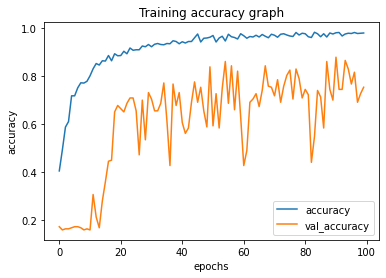

In [124]:
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Training accuracy graph')
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

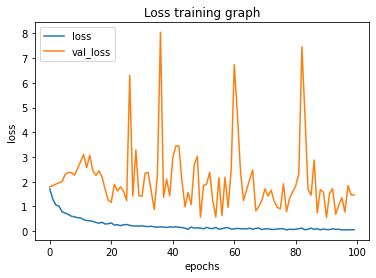

In [125]:
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Loss training graph')
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

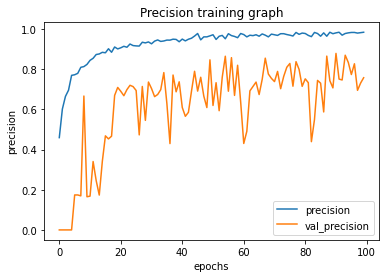

In [126]:
plt.xlabel('epochs')
plt.ylabel('precision')
plt.title('Precision training graph')
plt.plot(history.history['precision_1'],label='precision')
plt.plot(history.history['val_precision_1'],label='val_precision')
plt.legend()
plt.show()

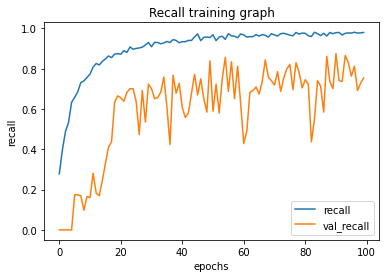

In [127]:
plt.xlabel('epochs')
plt.ylabel('recall')
plt.title('Recall training graph')
plt.plot(history.history['recall_1'],label='recall')
plt.plot(history.history['val_recall_1'],label='val_recall')
plt.legend()
plt.show()

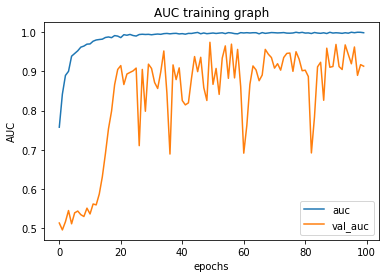

In [128]:
plt.xlabel('epochs')
plt.ylabel('AUC')
plt.title('AUC training graph')
plt.plot(history.history['auc_1'],label='auc')
plt.plot(history.history['val_auc_1'],label='val_auc')
plt.legend()
plt.show()

## Testing the model

In [130]:
test_loss,test_accuracy,test_precision,test_recall,test_auc=model.evaluate(test_dataset)

10/10 [==============================] - 1s 128ms/step - loss: 2.2759 - accuracy: 0.7033 - precision_1: 0.7071 - recall_1: 0.7000 - auc_1: 0.8915


In [132]:
print('Accuracy of the model is : ',test_accuracy*100)
print('Loss of the model is : ',test_loss)
print('Precision of the model is : ',test_precision*100)
print('Recall of the model is : ',test_recall*100)
print('AUC of the model is : ',test_auc*100)

Accuracy of the model is :  70.333331823349
Loss of the model is :  2.275860071182251
Precision of the model is :  70.70707082748413
Recall of the model is :  69.9999988079071
AUC of the model is :  89.15199637413025


## Save Model h5 format
This file includes
- Model architecture
- Model weight values during training
- model training config 
- optimizer 

In [139]:
import time
t = time.time()
export_path_keras = "/content/drive/MyDrive/CSE 4000 Thesis/Transfer Learning TF Keras/CNN_model{}_time_{}.h5".format(test_accuracy,int(t))
print(export_path_keras)
model.save(export_path_keras)

/content/drive/MyDrive/CSE 4000 Thesis/Transfer Learning TF Keras/CNN_model0.70333331823349_time_1625132063.h5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


## Reload the model h5 format

In [140]:
from tensorflow.keras.models import load_model

In [141]:
reload_model=load_model(export_path_keras)
reload_model.summary()

Model: "classifier"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_12 (Conv2D)              (None, 112, 112, 32) 896         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_22 (BatchNo (None, 112, 112, 32) 128         conv2d_12[0][0]                  
__________________________________________________________________________________________________
activation_22 (Activation)      (None, 112, 112, 32) 0           batch_normalization_22[0][0]     
_________________________________________________________________________________________

## Check Random Image

In [ ]:
image_batch,label_batch=next(iter(test_dataset))

In [ ]:
label_batch[:5]

In [ ]:
image_batch.shape

In [ ]:
label_batch.shape

In [ ]:
iter(test_dataset)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()

In [ ]:
test_dataset

## Classification report 

In [133]:
predicted_result=model.predict(test_dataset)
predicted_result[:5]

array([[9.8171105e-10, 9.9999988e-01, 1.7947026e-14, 7.8764903e-12,
        1.7532118e-14, 7.8741927e-08],
       [6.8855030e-12, 1.5359964e-09, 1.2254235e-20, 1.0000000e+00,
        8.6686768e-14, 2.6571515e-08],
       [3.6288561e-08, 1.2547232e-05, 7.2196613e-09, 9.9994302e-01,
        6.7559449e-07, 4.3611049e-05],
       [2.2711997e-06, 9.9999678e-01, 4.3897615e-16, 2.5864820e-08,
        4.4212203e-09, 9.4566150e-07],
       [9.9994695e-01, 3.5750625e-05, 9.2201044e-15, 1.1472678e-14,
        5.8631425e-13, 1.7238632e-05]], dtype=float32)

In [134]:
predicted_result.shape

(300, 6)

In [135]:
predicted_value=np.argmax(model.predict(test_dataset),axis=-1)
predicted_value

array([5, 5, 1, 5, 1, 3, 5, 1, 5, 1, 5, 5, 5, 3, 3, 3, 2, 1, 5, 5, 4, 2,
       4, 1, 1, 1, 2, 3, 3, 1, 3, 1, 2, 5, 1, 1, 5, 5, 5, 3, 2, 5, 4, 1,
       3, 1, 5, 3, 3, 2, 5, 1, 5, 5, 1, 0, 3, 1, 0, 5, 5, 2, 0, 1, 1, 1,
       5, 1, 0, 5, 4, 2, 2, 5, 5, 5, 4, 1, 1, 1, 3, 5, 4, 5, 2, 5, 1, 0,
       1, 3, 4, 5, 1, 1, 1, 4, 1, 3, 1, 3, 3, 1, 1, 3, 3, 1, 1, 3, 5, 5,
       5, 2, 1, 5, 3, 3, 5, 5, 5, 5, 5, 3, 2, 5, 5, 0, 2, 5, 1, 3, 1, 1,
       1, 5, 4, 3, 3, 3, 5, 1, 5, 3, 2, 3, 3, 1, 1, 4, 1, 1, 5, 5, 5, 5,
       5, 2, 5, 5, 1, 5, 5, 1, 4, 0, 0, 1, 5, 5, 3, 1, 1, 5, 2, 5, 5, 0,
       4, 5, 5, 5, 0, 2, 1, 3, 3, 5, 1, 5, 1, 2, 0, 4, 1, 3, 5, 5, 5, 2,
       1, 2, 5, 2, 4, 5, 1, 1, 5, 2, 1, 5, 5, 0, 3, 1, 1, 0, 2, 1, 1, 1,
       5, 1, 4, 5, 1, 2, 1, 1, 4, 1, 0, 4, 0, 5, 5, 1, 3, 1, 3, 5, 3, 3,
       3, 1, 5, 3, 2, 5, 4, 5, 1, 3, 1, 3, 5, 1, 5, 1, 5, 4, 1, 5, 5, 3,
       5, 1, 1, 5, 5, 1, 5, 0, 3, 1, 5, 5, 3, 3, 3, 1, 2, 1, 1, 0, 5, 1,
       3, 3, 2, 3, 5, 1, 0, 3, 5, 2, 5, 5, 4, 4])

In [136]:
test_value=test_dataset.classes
test_value

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5], d

In [137]:
from sklearn.metrics import accuracy_score
print('Accuracy score: ',accuracy_score(test_dataset.classes,predicted_value))

Accuracy score:  0.15333333333333332


In [138]:
from sklearn.metrics import classification_report
print('classification report \n',classification_report(test_dataset.classes,predicted_value))

classification report 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.20      0.34      0.25        50
           2       0.14      0.08      0.10        50
           3       0.08      0.08      0.08        50
           4       0.24      0.10      0.14        50
           5       0.17      0.32      0.22        50

    accuracy                           0.15       300
   macro avg       0.14      0.15      0.13       300
weighted avg       0.14      0.15      0.13       300



## Another approach to calculate the classification report

In [ ]:
predicted_array=model.predict(validation_dataset)
predicted_array